### 데이터 전처리

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("../data/santander/train.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [14]:
# pd.read_csv("../data/santander/test.csv",encoding='latin-1')

In [5]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [6]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
cust_df.var3.value_counts().sort_values(ascending=False)[:5]

 2         74165
 8           138
-999999      116
 9           110
 3           108
Name: var3, dtype: int64

In [12]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0, stratify=y_labels)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82569	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88675	validation_1-auc:0.82453
[18]	validation_0-au

In [18]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.70654	validation_1-auc:0.67817
[1]	validation_0-auc:0.73189	validation_1-auc:0.70514
[2]	validation_0-auc:0.81996	validation_1-auc:0.78750
[3]	validation_0-auc:0.83320	validation_1-auc:0.80213
[4]	validation_0-auc:0.83949	validation_1-auc:0.80794
[5]	validation_0-auc:0.84186	validation_1-auc:0.81103
[6]	validation_0-auc:0.84286	validation_1-auc:0.80875
[7]	validation_0-auc:0.84853	validation_1-auc:0.81403
[8]	validation_0-auc:0.84752	validation_1-auc:0.81134
[9]	validation_0-auc:0.84584	validation_1-auc:0.80799
[10]	validation_0-auc:0.85212	validation_1-auc:0.81358
[11]	validation_0-auc:0.85540	validation_1-auc:0.81618
[12]	validation_0-auc:0.85749	validation_1-auc:0.81739
[13]	validation_0-auc:0.85850	validation_1-auc:0.81642
[14]	validation_0-auc:0.85966	validation_1-auc:0.81634
[15]	validation_0-auc:0.86234	validation_1-auc:0.81877
[16]	validation_0-auc:0.86272	validation_1-auc:0.81800
[17]	validation_0-auc:0.86425	validation_1-auc:0.81967
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72783	validation_1-auc:0.70300
[1]	validation_0-auc:0.74412	validation_1-auc:0.71808
[2]	validation_0-auc:0.81801	validation_1-auc:0.78752
[3]	validation_0-auc:0.83189	validation_1-auc:0.79897
[4]	validation_0-auc:0.83969	validation_1-auc:0.80782
[5]	validation_0-auc:0.84405	validation_1-auc:0.80935
[6]	validation_0-auc:0.84194	validation_1-auc:0.80586
[7]	validation_0-auc:0.84791	validation_1-auc:0.81407
[8]	validation_0-auc:0.84668	validation_1-auc:0.81058
[9]	validation_0-auc:0.84805	validation_1-auc:0.80636
[10]	validation_0-auc:0.85310	validation_1-auc:0.81102
[11]	validation_0-auc:0.85510	validation_1-auc:0.81332
[12]	validation_0-auc:0.85763	validation_1-auc:0.81515
[13]	validation_0-auc:0.85889	validation_1-auc:0.81460
[14]	validation_0-auc:0.85897	validation_1-auc:0.81161
[15]	validation_0-auc:0.86081	validation_1-auc:0.81430
[16]	validation_0-auc:0.86188	validation_1-auc:0.81387
[17]	validation_0-auc:0.86335	validation_1-auc:0.81461
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72686	validation_1-auc:0.70676
[1]	validation_0-auc:0.75743	validation_1-auc:0.73285
[2]	validation_0-auc:0.82414	validation_1-auc:0.79894
[3]	validation_0-auc:0.83337	validation_1-auc:0.80629
[4]	validation_0-auc:0.84149	validation_1-auc:0.81352
[5]	validation_0-auc:0.84339	validation_1-auc:0.81542
[6]	validation_0-auc:0.84282	validation_1-auc:0.81244
[7]	validation_0-auc:0.84783	validation_1-auc:0.81590
[8]	validation_0-auc:0.84707	validation_1-auc:0.81315
[9]	validation_0-auc:0.84537	validation_1-auc:0.80735
[10]	validation_0-auc:0.85239	validation_1-auc:0.81294
[11]	validation_0-auc:0.85572	validation_1-auc:0.81639
[12]	validation_0-auc:0.85807	validation_1-auc:0.81984
[13]	validation_0-auc:0.85828	validation_1-auc:0.81772
[14]	validation_0-auc:0.85972	validation_1-auc:0.81629
[15]	validation_0-auc:0.86257	validation_1-auc:0.81841
[16]	validation_0-auc:0.86321	validation_1-auc:0.81860
[17]	validation_0-auc:0.86482	validation_1-auc:0.81997
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71266	validation_1-auc:0.69182
[1]	validation_0-auc:0.73357	validation_1-auc:0.70733
[2]	validation_0-auc:0.81856	validation_1-auc:0.78867
[3]	validation_0-auc:0.83296	validation_1-auc:0.80392
[4]	validation_0-auc:0.84052	validation_1-auc:0.80950
[5]	validation_0-auc:0.84455	validation_1-auc:0.81191
[6]	validation_0-auc:0.84420	validation_1-auc:0.80947
[7]	validation_0-auc:0.84948	validation_1-auc:0.81583
[8]	validation_0-auc:0.84734	validation_1-auc:0.81271
[9]	validation_0-auc:0.84592	validation_1-auc:0.81031
[10]	validation_0-auc:0.85141	validation_1-auc:0.81503
[11]	validation_0-auc:0.85443	validation_1-auc:0.81781
[12]	validation_0-auc:0.85613	validation_1-auc:0.81798
[13]	validation_0-auc:0.85765	validation_1-auc:0.81726
[14]	validation_0-auc:0.85860	validation_1-auc:0.81788
[15]	validation_0-auc:0.86080	validation_1-auc:0.82030
[16]	validation_0-auc:0.86126	validation_1-auc:0.82080
[17]	validation_0-auc:0.86241	validation_1-auc:0.82172
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72758	validation_1-auc:0.70261
[1]	validation_0-auc:0.74613	validation_1-auc:0.71864
[2]	validation_0-auc:0.81886	validation_1-auc:0.78905
[3]	validation_0-auc:0.83179	validation_1-auc:0.80194
[4]	validation_0-auc:0.83920	validation_1-auc:0.80951
[5]	validation_0-auc:0.84350	validation_1-auc:0.81128
[6]	validation_0-auc:0.84127	validation_1-auc:0.80598
[7]	validation_0-auc:0.84901	validation_1-auc:0.81587
[8]	validation_0-auc:0.84697	validation_1-auc:0.81146
[9]	validation_0-auc:0.84682	validation_1-auc:0.80782
[10]	validation_0-auc:0.85246	validation_1-auc:0.81172
[11]	validation_0-auc:0.85511	validation_1-auc:0.81490
[12]	validation_0-auc:0.85754	validation_1-auc:0.81612
[13]	validation_0-auc:0.85818	validation_1-auc:0.81552
[14]	validation_0-auc:0.85852	validation_1-auc:0.81382
[15]	validation_0-auc:0.86071	validation_1-auc:0.81716
[16]	validation_0-auc:0.86155	validation_1-auc:0.81671
[17]	validation_0-auc:0.86286	validation_1-auc:0.81706
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72734	validation_1-auc:0.70571
[1]	validation_0-auc:0.75633	validation_1-auc:0.73092
[2]	validation_0-auc:0.82422	validation_1-auc:0.79729
[3]	validation_0-auc:0.83321	validation_1-auc:0.80463
[4]	validation_0-auc:0.84118	validation_1-auc:0.81424
[5]	validation_0-auc:0.84287	validation_1-auc:0.81626
[6]	validation_0-auc:0.84162	validation_1-auc:0.81367
[7]	validation_0-auc:0.84801	validation_1-auc:0.81616
[8]	validation_0-auc:0.84728	validation_1-auc:0.81330
[9]	validation_0-auc:0.84455	validation_1-auc:0.80935
[10]	validation_0-auc:0.84983	validation_1-auc:0.81478
[11]	validation_0-auc:0.85395	validation_1-auc:0.81743
[12]	validation_0-auc:0.85667	validation_1-auc:0.82046
[13]	validation_0-auc:0.85721	validation_1-auc:0.81994
[14]	validation_0-auc:0.85754	validation_1-auc:0.81758
[15]	validation_0-auc:0.86001	validation_1-auc:0.82042
[16]	validation_0-auc:0.86077	validation_1-auc:0.81869
[17]	validation_0-auc:0.86237	validation_1-auc:0.81993
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71678	validation_1-auc:0.69339
[1]	validation_0-auc:0.73732	validation_1-auc:0.70803
[2]	validation_0-auc:0.82644	validation_1-auc:0.78997
[3]	validation_0-auc:0.84287	validation_1-auc:0.80244
[4]	validation_0-auc:0.84926	validation_1-auc:0.80762
[5]	validation_0-auc:0.85447	validation_1-auc:0.81232
[6]	validation_0-auc:0.85560	validation_1-auc:0.80924
[7]	validation_0-auc:0.86203	validation_1-auc:0.81373
[8]	validation_0-auc:0.86224	validation_1-auc:0.81080
[9]	validation_0-auc:0.86093	validation_1-auc:0.80817
[10]	validation_0-auc:0.86841	validation_1-auc:0.81251
[11]	validation_0-auc:0.87252	validation_1-auc:0.81529
[12]	validation_0-auc:0.87563	validation_1-auc:0.81601
[13]	validation_0-auc:0.87671	validation_1-auc:0.81547
[14]	validation_0-auc:0.87792	validation_1-auc:0.81538
[15]	validation_0-auc:0.88048	validation_1-auc:0.81756
[16]	validation_0-auc:0.88090	validation_1-auc:0.81688
[17]	validation_0-auc:0.88277	validation_1-auc:0.81783
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72940	validation_1-auc:0.70396
[1]	validation_0-auc:0.75027	validation_1-auc:0.72265
[2]	validation_0-auc:0.82655	validation_1-auc:0.79431
[3]	validation_0-auc:0.83968	validation_1-auc:0.80846
[4]	validation_0-auc:0.84877	validation_1-auc:0.81319
[5]	validation_0-auc:0.85393	validation_1-auc:0.81536
[6]	validation_0-auc:0.85377	validation_1-auc:0.81093
[7]	validation_0-auc:0.86072	validation_1-auc:0.81491
[8]	validation_0-auc:0.86056	validation_1-auc:0.81021
[9]	validation_0-auc:0.86138	validation_1-auc:0.80593
[10]	validation_0-auc:0.86573	validation_1-auc:0.80972
[11]	validation_0-auc:0.86963	validation_1-auc:0.81410
[12]	validation_0-auc:0.87296	validation_1-auc:0.81772
[13]	validation_0-auc:0.87527	validation_1-auc:0.81646
[14]	validation_0-auc:0.87587	validation_1-auc:0.81235
[15]	validation_0-auc:0.87904	validation_1-auc:0.81497
[16]	validation_0-auc:0.88004	validation_1-auc:0.81441
[17]	validation_0-auc:0.88193	validation_1-auc:0.81714
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72905	validation_1-auc:0.70474
[1]	validation_0-auc:0.76450	validation_1-auc:0.73252
[2]	validation_0-auc:0.82992	validation_1-auc:0.79810
[3]	validation_0-auc:0.84237	validation_1-auc:0.80920
[4]	validation_0-auc:0.85108	validation_1-auc:0.81141
[5]	validation_0-auc:0.85437	validation_1-auc:0.81436
[6]	validation_0-auc:0.85394	validation_1-auc:0.81119
[7]	validation_0-auc:0.86106	validation_1-auc:0.81623
[8]	validation_0-auc:0.86079	validation_1-auc:0.81368
[9]	validation_0-auc:0.85932	validation_1-auc:0.81071
[10]	validation_0-auc:0.86595	validation_1-auc:0.81615
[11]	validation_0-auc:0.86978	validation_1-auc:0.81869
[12]	validation_0-auc:0.87270	validation_1-auc:0.81962
[13]	validation_0-auc:0.87414	validation_1-auc:0.81766
[14]	validation_0-auc:0.87533	validation_1-auc:0.81847
[15]	validation_0-auc:0.87881	validation_1-auc:0.82136
[16]	validation_0-auc:0.87945	validation_1-auc:0.82066
[17]	validation_0-auc:0.88175	validation_1-auc:0.82117
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71575	validation_1-auc:0.69359
[1]	validation_0-auc:0.74203	validation_1-auc:0.71466
[2]	validation_0-auc:0.82691	validation_1-auc:0.79313
[3]	validation_0-auc:0.83957	validation_1-auc:0.80175
[4]	validation_0-auc:0.84848	validation_1-auc:0.80786
[5]	validation_0-auc:0.85305	validation_1-auc:0.81056
[6]	validation_0-auc:0.85249	validation_1-auc:0.80671
[7]	validation_0-auc:0.85932	validation_1-auc:0.81154
[8]	validation_0-auc:0.85911	validation_1-auc:0.80756
[9]	validation_0-auc:0.85845	validation_1-auc:0.80321
[10]	validation_0-auc:0.86499	validation_1-auc:0.80828
[11]	validation_0-auc:0.86789	validation_1-auc:0.81111
[12]	validation_0-auc:0.87070	validation_1-auc:0.81117
[13]	validation_0-auc:0.87182	validation_1-auc:0.80943
[14]	validation_0-auc:0.87256	validation_1-auc:0.81030
[15]	validation_0-auc:0.87524	validation_1-auc:0.81243
[16]	validation_0-auc:0.87611	validation_1-auc:0.81140
[17]	validation_0-auc:0.87782	validation_1-auc:0.81283
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73196	validation_1-auc:0.70233
[1]	validation_0-auc:0.75303	validation_1-auc:0.71742
[2]	validation_0-auc:0.82804	validation_1-auc:0.79231
[3]	validation_0-auc:0.84125	validation_1-auc:0.80372
[4]	validation_0-auc:0.84782	validation_1-auc:0.80963
[5]	validation_0-auc:0.85254	validation_1-auc:0.81207
[6]	validation_0-auc:0.85156	validation_1-auc:0.80820
[7]	validation_0-auc:0.85850	validation_1-auc:0.81412
[8]	validation_0-auc:0.85884	validation_1-auc:0.80780
[9]	validation_0-auc:0.85872	validation_1-auc:0.80700
[10]	validation_0-auc:0.86476	validation_1-auc:0.81126
[11]	validation_0-auc:0.86752	validation_1-auc:0.81341
[12]	validation_0-auc:0.86939	validation_1-auc:0.81831
[13]	validation_0-auc:0.86972	validation_1-auc:0.81747
[14]	validation_0-auc:0.87099	validation_1-auc:0.81506
[15]	validation_0-auc:0.87409	validation_1-auc:0.81768
[16]	validation_0-auc:0.87555	validation_1-auc:0.81594
[17]	validation_0-auc:0.87700	validation_1-auc:0.81804
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73116	validation_1-auc:0.70356
[1]	validation_0-auc:0.76390	validation_1-auc:0.73043
[2]	validation_0-auc:0.82942	validation_1-auc:0.79742
[3]	validation_0-auc:0.84110	validation_1-auc:0.81063
[4]	validation_0-auc:0.84923	validation_1-auc:0.81260
[5]	validation_0-auc:0.85193	validation_1-auc:0.81634
[6]	validation_0-auc:0.85118	validation_1-auc:0.81246
[7]	validation_0-auc:0.85842	validation_1-auc:0.81575
[8]	validation_0-auc:0.85728	validation_1-auc:0.81208
[9]	validation_0-auc:0.85568	validation_1-auc:0.80866
[10]	validation_0-auc:0.86220	validation_1-auc:0.81349
[11]	validation_0-auc:0.86582	validation_1-auc:0.81751
[12]	validation_0-auc:0.86881	validation_1-auc:0.81908
[13]	validation_0-auc:0.86954	validation_1-auc:0.81749
[14]	validation_0-auc:0.87109	validation_1-auc:0.81711
[15]	validation_0-auc:0.87386	validation_1-auc:0.81996
[16]	validation_0-auc:0.87450	validation_1-auc:0.81926
[17]	validation_0-auc:0.87591	validation_1-auc:0.82068
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73009	validation_1-auc:0.69895
[1]	validation_0-auc:0.74938	validation_1-auc:0.71941
[2]	validation_0-auc:0.81594	validation_1-auc:0.78455
[3]	validation_0-auc:0.83287	validation_1-auc:0.79916
[4]	validation_0-auc:0.84058	validation_1-auc:0.80769
[5]	validation_0-auc:0.84311	validation_1-auc:0.81147
[6]	validation_0-auc:0.84343	validation_1-auc:0.80893
[7]	validation_0-auc:0.84828	validation_1-auc:0.81238
[8]	validation_0-auc:0.84793	validation_1-auc:0.81001
[9]	validation_0-auc:0.84790	validation_1-auc:0.80640
[10]	validation_0-auc:0.85357	validation_1-auc:0.81166
[11]	validation_0-auc:0.85712	validation_1-auc:0.81581
[12]	validation_0-auc:0.86053	validation_1-auc:0.81880
[13]	validation_0-auc:0.86134	validation_1-auc:0.81759
[14]	validation_0-auc:0.86310	validation_1-auc:0.81947
[15]	validation_0-auc:0.86430	validation_1-auc:0.82046
[16]	validation_0-auc:0.86611	validation_1-auc:0.82115
[17]	validation_0-auc:0.86752	validation_1-auc:0.82134
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72992	validation_1-auc:0.70151
[1]	validation_0-auc:0.74711	validation_1-auc:0.71767
[2]	validation_0-auc:0.82110	validation_1-auc:0.78719
[3]	validation_0-auc:0.83493	validation_1-auc:0.80218
[4]	validation_0-auc:0.84194	validation_1-auc:0.81173
[5]	validation_0-auc:0.84544	validation_1-auc:0.81377
[6]	validation_0-auc:0.84438	validation_1-auc:0.81031
[7]	validation_0-auc:0.84974	validation_1-auc:0.81450
[8]	validation_0-auc:0.85072	validation_1-auc:0.81173
[9]	validation_0-auc:0.85083	validation_1-auc:0.81097
[10]	validation_0-auc:0.85501	validation_1-auc:0.81488
[11]	validation_0-auc:0.85800	validation_1-auc:0.81652
[12]	validation_0-auc:0.86067	validation_1-auc:0.81858
[13]	validation_0-auc:0.86188	validation_1-auc:0.81795
[14]	validation_0-auc:0.86374	validation_1-auc:0.81886
[15]	validation_0-auc:0.86481	validation_1-auc:0.81985
[16]	validation_0-auc:0.86612	validation_1-auc:0.82088
[17]	validation_0-auc:0.86750	validation_1-auc:0.82092
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73701	validation_1-auc:0.70764
[1]	validation_0-auc:0.76062	validation_1-auc:0.72784
[2]	validation_0-auc:0.82070	validation_1-auc:0.78865
[3]	validation_0-auc:0.83388	validation_1-auc:0.80247
[4]	validation_0-auc:0.84206	validation_1-auc:0.81088
[5]	validation_0-auc:0.84561	validation_1-auc:0.81541
[6]	validation_0-auc:0.84328	validation_1-auc:0.80910
[7]	validation_0-auc:0.84849	validation_1-auc:0.81458
[8]	validation_0-auc:0.85012	validation_1-auc:0.81113
[9]	validation_0-auc:0.84852	validation_1-auc:0.80745
[10]	validation_0-auc:0.85405	validation_1-auc:0.81381
[11]	validation_0-auc:0.85712	validation_1-auc:0.81753
[12]	validation_0-auc:0.85924	validation_1-auc:0.82068
[13]	validation_0-auc:0.86013	validation_1-auc:0.81851
[14]	validation_0-auc:0.86256	validation_1-auc:0.82045
[15]	validation_0-auc:0.86401	validation_1-auc:0.82168
[16]	validation_0-auc:0.86539	validation_1-auc:0.82153
[17]	validation_0-auc:0.86613	validation_1-auc:0.82207
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73477	validation_1-auc:0.69745
[1]	validation_0-auc:0.75410	validation_1-auc:0.71779
[2]	validation_0-auc:0.81646	validation_1-auc:0.78294
[3]	validation_0-auc:0.83755	validation_1-auc:0.80166
[4]	validation_0-auc:0.84253	validation_1-auc:0.80757
[5]	validation_0-auc:0.84560	validation_1-auc:0.81276
[6]	validation_0-auc:0.84564	validation_1-auc:0.81039
[7]	validation_0-auc:0.84982	validation_1-auc:0.81281
[8]	validation_0-auc:0.84836	validation_1-auc:0.81145
[9]	validation_0-auc:0.84869	validation_1-auc:0.80854
[10]	validation_0-auc:0.85401	validation_1-auc:0.81086
[11]	validation_0-auc:0.85681	validation_1-auc:0.81615
[12]	validation_0-auc:0.85983	validation_1-auc:0.81940
[13]	validation_0-auc:0.86108	validation_1-auc:0.81800
[14]	validation_0-auc:0.86251	validation_1-auc:0.82023
[15]	validation_0-auc:0.86371	validation_1-auc:0.82164
[16]	validation_0-auc:0.86427	validation_1-auc:0.82255
[17]	validation_0-auc:0.86559	validation_1-auc:0.82235
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73183	validation_1-auc:0.70199
[1]	validation_0-auc:0.75076	validation_1-auc:0.72103
[2]	validation_0-auc:0.82202	validation_1-auc:0.78621
[3]	validation_0-auc:0.83443	validation_1-auc:0.79903
[4]	validation_0-auc:0.84121	validation_1-auc:0.80613
[5]	validation_0-auc:0.84688	validation_1-auc:0.81219
[6]	validation_0-auc:0.84418	validation_1-auc:0.80552
[7]	validation_0-auc:0.84958	validation_1-auc:0.81361
[8]	validation_0-auc:0.84998	validation_1-auc:0.81110
[9]	validation_0-auc:0.84890	validation_1-auc:0.80946
[10]	validation_0-auc:0.85402	validation_1-auc:0.81315
[11]	validation_0-auc:0.85728	validation_1-auc:0.81676
[12]	validation_0-auc:0.85943	validation_1-auc:0.81881
[13]	validation_0-auc:0.86036	validation_1-auc:0.81750
[14]	validation_0-auc:0.86178	validation_1-auc:0.81904
[15]	validation_0-auc:0.86330	validation_1-auc:0.82108
[16]	validation_0-auc:0.86459	validation_1-auc:0.82135
[17]	validation_0-auc:0.86547	validation_1-auc:0.82147
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74115	validation_1-auc:0.70807
[1]	validation_0-auc:0.76368	validation_1-auc:0.72627
[2]	validation_0-auc:0.82339	validation_1-auc:0.79134
[3]	validation_0-auc:0.83425	validation_1-auc:0.80253
[4]	validation_0-auc:0.84102	validation_1-auc:0.80985
[5]	validation_0-auc:0.84530	validation_1-auc:0.81503
[6]	validation_0-auc:0.84292	validation_1-auc:0.80855
[7]	validation_0-auc:0.84791	validation_1-auc:0.81273
[8]	validation_0-auc:0.84938	validation_1-auc:0.80766
[9]	validation_0-auc:0.84767	validation_1-auc:0.80447
[10]	validation_0-auc:0.85278	validation_1-auc:0.81042
[11]	validation_0-auc:0.85593	validation_1-auc:0.81416
[12]	validation_0-auc:0.85874	validation_1-auc:0.81670
[13]	validation_0-auc:0.85884	validation_1-auc:0.81607
[14]	validation_0-auc:0.86057	validation_1-auc:0.81908
[15]	validation_0-auc:0.86220	validation_1-auc:0.81941
[16]	validation_0-auc:0.86414	validation_1-auc:0.82081
[17]	validation_0-auc:0.86471	validation_1-auc:0.82123
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73986	validation_1-auc:0.70597
[1]	validation_0-auc:0.75945	validation_1-auc:0.72283
[2]	validation_0-auc:0.82930	validation_1-auc:0.79022
[3]	validation_0-auc:0.84410	validation_1-auc:0.80515
[4]	validation_0-auc:0.85047	validation_1-auc:0.81141
[5]	validation_0-auc:0.85570	validation_1-auc:0.81545
[6]	validation_0-auc:0.85670	validation_1-auc:0.81353
[7]	validation_0-auc:0.86354	validation_1-auc:0.81372
[8]	validation_0-auc:0.86467	validation_1-auc:0.80993
[9]	validation_0-auc:0.86440	validation_1-auc:0.80691
[10]	validation_0-auc:0.86981	validation_1-auc:0.81064
[11]	validation_0-auc:0.87420	validation_1-auc:0.81603
[12]	validation_0-auc:0.87695	validation_1-auc:0.81650
[13]	validation_0-auc:0.87822	validation_1-auc:0.81415
[14]	validation_0-auc:0.88138	validation_1-auc:0.81424
[15]	validation_0-auc:0.88272	validation_1-auc:0.81603
[16]	validation_0-auc:0.88546	validation_1-auc:0.81696
[17]	validation_0-auc:0.88734	validation_1-auc:0.81827
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73689	validation_1-auc:0.70091
[1]	validation_0-auc:0.76426	validation_1-auc:0.72133
[2]	validation_0-auc:0.83234	validation_1-auc:0.78407
[3]	validation_0-auc:0.84550	validation_1-auc:0.79929
[4]	validation_0-auc:0.85187	validation_1-auc:0.80557
[5]	validation_0-auc:0.85747	validation_1-auc:0.81092
[6]	validation_0-auc:0.85664	validation_1-auc:0.80464
[7]	validation_0-auc:0.86359	validation_1-auc:0.81113
[8]	validation_0-auc:0.86415	validation_1-auc:0.80617
[9]	validation_0-auc:0.86482	validation_1-auc:0.80443
[10]	validation_0-auc:0.87031	validation_1-auc:0.81011
[11]	validation_0-auc:0.87420	validation_1-auc:0.81382
[12]	validation_0-auc:0.87671	validation_1-auc:0.81642
[13]	validation_0-auc:0.87768	validation_1-auc:0.81438
[14]	validation_0-auc:0.88023	validation_1-auc:0.81677
[15]	validation_0-auc:0.88214	validation_1-auc:0.81774
[16]	validation_0-auc:0.88335	validation_1-auc:0.81937
[17]	validation_0-auc:0.88458	validation_1-auc:0.81923
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74553	validation_1-auc:0.70804
[1]	validation_0-auc:0.77168	validation_1-auc:0.73207
[2]	validation_0-auc:0.83108	validation_1-auc:0.79305
[3]	validation_0-auc:0.84309	validation_1-auc:0.80583
[4]	validation_0-auc:0.84930	validation_1-auc:0.81061
[5]	validation_0-auc:0.85436	validation_1-auc:0.81298
[6]	validation_0-auc:0.85267	validation_1-auc:0.80907
[7]	validation_0-auc:0.86071	validation_1-auc:0.81457
[8]	validation_0-auc:0.86444	validation_1-auc:0.80882
[9]	validation_0-auc:0.86499	validation_1-auc:0.80358
[10]	validation_0-auc:0.87217	validation_1-auc:0.80950
[11]	validation_0-auc:0.87583	validation_1-auc:0.81323
[12]	validation_0-auc:0.87913	validation_1-auc:0.81539
[13]	validation_0-auc:0.88024	validation_1-auc:0.81172
[14]	validation_0-auc:0.88292	validation_1-auc:0.81481
[15]	validation_0-auc:0.88449	validation_1-auc:0.81643
[16]	validation_0-auc:0.88546	validation_1-auc:0.81740
[17]	validation_0-auc:0.88670	validation_1-auc:0.81742
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74089	validation_1-auc:0.70149
[1]	validation_0-auc:0.76082	validation_1-auc:0.71914
[2]	validation_0-auc:0.82876	validation_1-auc:0.78438
[3]	validation_0-auc:0.84505	validation_1-auc:0.80323
[4]	validation_0-auc:0.85121	validation_1-auc:0.81286
[5]	validation_0-auc:0.85639	validation_1-auc:0.81661
[6]	validation_0-auc:0.85659	validation_1-auc:0.81142
[7]	validation_0-auc:0.86077	validation_1-auc:0.81416
[8]	validation_0-auc:0.86140	validation_1-auc:0.81339
[9]	validation_0-auc:0.86082	validation_1-auc:0.80962
[10]	validation_0-auc:0.86694	validation_1-auc:0.81352
[11]	validation_0-auc:0.87070	validation_1-auc:0.81907
[12]	validation_0-auc:0.87244	validation_1-auc:0.82024
[13]	validation_0-auc:0.87343	validation_1-auc:0.81818
[14]	validation_0-auc:0.87591	validation_1-auc:0.82000
[15]	validation_0-auc:0.87792	validation_1-auc:0.82136
[16]	validation_0-auc:0.87953	validation_1-auc:0.82213
[17]	validation_0-auc:0.88121	validation_1-auc:0.82108
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73590	validation_1-auc:0.70153
[1]	validation_0-auc:0.75641	validation_1-auc:0.71786
[2]	validation_0-auc:0.83166	validation_1-auc:0.79014
[3]	validation_0-auc:0.84355	validation_1-auc:0.80064
[4]	validation_0-auc:0.84945	validation_1-auc:0.80438
[5]	validation_0-auc:0.85607	validation_1-auc:0.80951
[6]	validation_0-auc:0.85630	validation_1-auc:0.80558
[7]	validation_0-auc:0.86255	validation_1-auc:0.81222
[8]	validation_0-auc:0.86190	validation_1-auc:0.80818
[9]	validation_0-auc:0.86155	validation_1-auc:0.80538
[10]	validation_0-auc:0.86788	validation_1-auc:0.80942
[11]	validation_0-auc:0.87147	validation_1-auc:0.81438
[12]	validation_0-auc:0.87450	validation_1-auc:0.81536
[13]	validation_0-auc:0.87541	validation_1-auc:0.81525
[14]	validation_0-auc:0.87697	validation_1-auc:0.81558
[15]	validation_0-auc:0.87839	validation_1-auc:0.81586
[16]	validation_0-auc:0.87992	validation_1-auc:0.81851
[17]	validation_0-auc:0.88130	validation_1-auc:0.81850
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74669	validation_1-auc:0.70962
[1]	validation_0-auc:0.77182	validation_1-auc:0.73045
[2]	validation_0-auc:0.83056	validation_1-auc:0.79139
[3]	validation_0-auc:0.84312	validation_1-auc:0.80332
[4]	validation_0-auc:0.84876	validation_1-auc:0.80853
[5]	validation_0-auc:0.85430	validation_1-auc:0.81219
[6]	validation_0-auc:0.85286	validation_1-auc:0.80694
[7]	validation_0-auc:0.85994	validation_1-auc:0.81115
[8]	validation_0-auc:0.86252	validation_1-auc:0.80636
[9]	validation_0-auc:0.86128	validation_1-auc:0.80151
[10]	validation_0-auc:0.86765	validation_1-auc:0.80694
[11]	validation_0-auc:0.87141	validation_1-auc:0.81059
[12]	validation_0-auc:0.87452	validation_1-auc:0.81576
[13]	validation_0-auc:0.87486	validation_1-auc:0.81134
[14]	validation_0-auc:0.87725	validation_1-auc:0.81303
[15]	validation_0-auc:0.87856	validation_1-auc:0.81366
[16]	validation_0-auc:0.87972	validation_1-auc:0.81267
[17]	validation_0-auc:0.88113	validation_1-auc:0.81307
[18]	validation_0-au

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72979	validation_1-auc:0.70466
[1]	validation_0-auc:0.75464	validation_1-auc:0.72441
[2]	validation_0-auc:0.82659	validation_1-auc:0.79544
[3]	validation_0-auc:0.83885	validation_1-auc:0.80461
[4]	validation_0-auc:0.84549	validation_1-auc:0.81055
[5]	validation_0-auc:0.84873	validation_1-auc:0.81264
[6]	validation_0-auc:0.84715	validation_1-auc:0.80925
[7]	validation_0-auc:0.85207	validation_1-auc:0.81328
[8]	validation_0-auc:0.85173	validation_1-auc:0.81038
[9]	validation_0-auc:0.85052	validation_1-auc:0.80919
[10]	validation_0-auc:0.85644	validation_1-auc:0.81514
[11]	validation_0-auc:0.85888	validation_1-auc:0.81768
[12]	validation_0-auc:0.86102	validation_1-auc:0.82092
[13]	validation_0-auc:0.86263	validation_1-auc:0.82019
[14]	validation_0-auc:0.86386	validation_1-auc:0.81946
[15]	validation_0-auc:0.86590	validation_1-auc:0.82173
[16]	validation_0-auc:0.86601	validation_1-auc:0.82081
[17]	validation_0-auc:0.86770	validation_1-auc:0.82241
[18]	validation_0-au

In [20]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=3, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.74824	validation_1-auc:0.71476
[1]	validation_0-auc:0.80819	validation_1-auc:0.77923
[2]	validation_0-auc:0.82731	validation_1-auc:0.79748
[3]	validation_0-auc:0.83103	validation_1-auc:0.80132
[4]	validation_0-auc:0.83281	validation_1-auc:0.80353
[5]	validation_0-auc:0.83532	validation_1-auc:0.80551
[6]	validation_0-auc:0.83779	validation_1-auc:0.80852
[7]	validation_0-auc:0.83722	validation_1-auc:0.80540
[8]	validation_0-auc:0.83881	validation_1-auc:0.80783
[9]	validation_0-auc:0.84022	validation_1-auc:0.80905
[10]	validation_0-auc:0.84158	validation_1-auc:0.80962
[11]	validation_0-auc:0.84217	validation_1-auc:0.81016
[12]	validation_0-auc:0.84198	validation_1-auc:0.80949
[13]	validation_0-auc:0.84218	validation_1-auc:0.80985
[14]	validation_0-auc:0.84302	validation_1-auc:0.81128
[15]	validation_0-auc:0.84157	validation_1-auc:0.80923
[16]	validation_0-auc:0.84238	validation_1-auc:0.80990
[17]	validation_0-auc:0.84239	validation_1-auc:0.80950
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

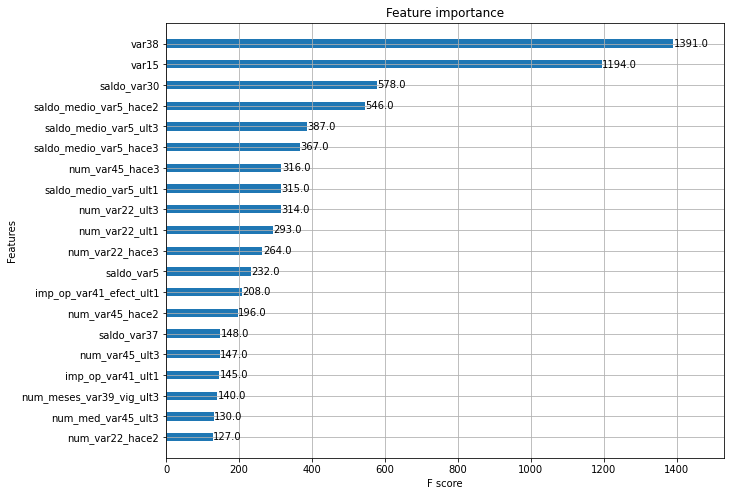

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [22]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.801789	valid_0's binary_logloss: 0.155038
[3]	valid_0's auc: 0.803367	valid_0's binary_logloss: 0.15185
[4]	valid_0's auc: 0.805168	valid_0's binary_logloss: 0.14961
[5]	valid_0's auc: 0.809401	valid_0's binary_logloss: 0.147695
[6]	valid_0's auc: 0.810671	valid_0's binary_logloss: 0.146234
[7]	valid_0's auc: 0.815356	valid_0's binary_logloss: 0.144877
[8]	valid_0's auc: 0.816777	valid_0's binary_logloss: 0.143783
[9]	valid_0's auc: 0.817821	valid_0's binary_logloss: 0.143084
[10]	valid_0's auc: 0.818637	valid_0's binary_logloss: 0.142272
[11]	valid_0's auc: 0.81939	valid_0's binary_logloss: 0.141623
[12]	valid_0's auc: 0.821106	valid_0's binary_logloss: 0.141043
[13]	valid_0's auc: 0.822008	valid_0's binary_logloss: 0.140628
[14]	valid_0's auc: 0.822584	valid_0's binary_logloss: 0.140198
[15]	valid_0's auc: 0.822291	valid_0's binary_logloss:

In [23]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.823013	valid_0's binary_logloss: 0.157599	valid_1's auc: 0.790743	valid_1's binary_logloss: 0.15957
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.152021	valid_1's auc: 0.798206	valid_1's binary_logloss: 0.154936
[3]	valid_0's auc: 0.834698	valid_0's binary_logloss: 0.147938	valid_1's auc: 0.80092	valid_1's binary_logloss: 0.151855
[4]	valid_0's auc: 0.841455	valid_0's binary_logloss: 0.144894	valid_1's auc: 0.806721	valid_1's binary_logloss: 0.149519
[5]	valid_0's auc: 0.844597	valid_0's binary_logloss: 0.142358	valid_1's auc: 0.811474	valid_1's binary_logloss: 0.14748
[6]	valid_0's auc: 0.846611	valid_0's binary_logloss: 0.140293	valid_1's auc: 0.814162	valid_1's binary_logloss: 0.145994
[7]	valid_0's auc: 0.848839	valid_0's binary_logloss: 0.138494	valid_1's auc: 0.813779	valid_1's binary_logloss: 0.144725
[8]	valid_0's auc: 0.850756	valid_0's binary_logloss: 0.137034	valid_1's auc: 0.81531	va

In [25]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.799534	valid_0's binary_logloss: 0.15915
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.813104	valid_0's binary_logloss: 0.154518
[3]	valid_0's auc: 0.815942	valid_0's binary_logloss: 0.151374
[4]	valid_0's auc: 0.817928	valid_0's binary_logloss: 0.148883
[5]	valid_0's auc: 0.818953	valid_0's binary_logloss: 0.147047
[6]	valid_0's auc: 0.819917	valid_0's binary_logloss: 0.145524
[7]	valid_0's auc: 0.819996	valid_0's binary_logloss: 0.144315
[8]	valid_0's auc: 0.820232	valid_0's binary_logloss: 0.143266
[9]	valid_0's auc: 0.820638	valid_0's binary_logloss: 0.142369
[10]	valid_0's auc: 0.821599	valid_0's binary_logloss: 0.141601
[11]	valid_0's auc: 0.821637	valid_0's binary_logloss: 0.14107
[12]	valid_0's auc: 0.822108	valid_0's binary_logloss: 0.14056
[13]	valid_0's auc: 0.822021	valid_0's binary_logloss: 0.140161
[14]	valid_0's auc: 0.822206	valid_0's binary_logloss: 0.139847
[15